In [1]:
import pandas as pd
import numpy as np

In [2]:
PATH = 'Downloads/AirQualityUCI_csv.csv'

In [3]:
df = pd.read_csv(PATH, delimiter = ';')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [4]:
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis = 1)
df = df.dropna(axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null object
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null object
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null object
RH               9357 non-null object
AH               9357 non-null object
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [5]:
len(set(df['Date']))

391

In [6]:
format_date_time = '%d/%m/%Y %H.%M.%S'
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format = format_date_time)
df = df.set_index('DateTime')
df.head(40)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
2004-03-10 19:00:00,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2004-03-10 20:00:00,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
2004-03-10 21:00:00,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
2004-03-10 22:00:00,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
2004-03-10 23:00:00,10/03/2004,23.00.00,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848"
2004-03-11 00:00:00,11/03/2004,00.00.00,"1,2",1185.0,31.0,"3,6",690.0,62.0,1462.0,77.0,1333.0,733.0,"11,3","56,8","0,7603"
2004-03-11 01:00:00,11/03/2004,01.00.00,1,1136.0,31.0,"3,3",672.0,62.0,1453.0,76.0,1333.0,730.0,"10,7","60,0","0,7702"
2004-03-11 02:00:00,11/03/2004,02.00.00,"0,9",1094.0,24.0,"2,3",609.0,45.0,1579.0,60.0,1276.0,620.0,"10,7","59,7","0,7648"


In [7]:
df = df.drop(['Date', 'Time'], axis = 1)

In [8]:
df_for_modelling = df[['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T']]
df_for_modelling.head()

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),T
DateTime,,,,,,
2004-03-10 18:00:00,"2,6",150.0,"11,9",166.0,113.0,"13,6"
2004-03-10 19:00:00,2,112.0,"9,4",103.0,92.0,"13,3"
2004-03-10 20:00:00,"2,2",88.0,"9,0",131.0,114.0,"11,9"
2004-03-10 21:00:00,"2,2",80.0,"9,2",172.0,122.0,"11,0"
2004-03-10 22:00:00,"1,6",51.0,"6,5",131.0,116.0,"11,2"


In [9]:
df_clean = df_for_modelling.replace(-200.0, np.nan)
df_clean = df_clean.replace('-200', np.nan)
df_clean = df_clean.replace('-200,0', np.nan)

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 6 columns):
CO(GT)      7674 non-null object
NMHC(GT)    914 non-null float64
C6H6(GT)    8991 non-null object
NOx(GT)     7718 non-null float64
NO2(GT)     7715 non-null float64
T           8991 non-null object
dtypes: float64(3), object(3)
memory usage: 511.7+ KB


In [11]:
df_clean = df_clean.drop('NMHC(GT)', axis = 1)

In [12]:
df_clean = df_clean.dropna(axis = 0)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6941 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 5 columns):
CO(GT)      6941 non-null object
C6H6(GT)    6941 non-null object
NOx(GT)     6941 non-null float64
NO2(GT)     6941 non-null float64
T           6941 non-null object
dtypes: float64(2), object(3)
memory usage: 325.4+ KB


In [13]:
def convert_to_numeric_with_decimal(col):
    l = [col[i].split(',')[0] + '.0' if len(col[i].split(',')) == 1 else col[i].split(',')[0] + '.' + col[i].split(',')[1] for i in range(len(col))]
    l = [float(l[i]) for i in range(len(l))]
    return l
CO_GT = convert_to_numeric_with_decimal(df_clean['CO(GT)'])
C6H6_GT = convert_to_numeric_with_decimal(df_clean['C6H6(GT)'])
T_1 = convert_to_numeric_with_decimal(df_clean['T'])

In [14]:
df_num = df_clean.drop(['CO(GT)', 'C6H6(GT)', 'T'], axis = 1)
df_num['CO(GT)'] = CO_GT
df_num['C6H6(GT)'] = C6H6_GT
df_num['T'] = T_1
df_num.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6941 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 5 columns):
NOx(GT)     6941 non-null float64
NO2(GT)     6941 non-null float64
CO(GT)      6941 non-null float64
C6H6(GT)    6941 non-null float64
T           6941 non-null float64
dtypes: float64(5)
memory usage: 645.4 KB


In [15]:
import matplotlib.pyplot as plt
df_num[['T']].plot()

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(df_num)
df_scaled = pd.DataFrame(data, columns = df_num.columns)
df_scaled.head()

,NOx(GT),NO2(GT),CO(GT),C6H6(GT),T
0,0.111036,0.335347,0.211864,0.184252,0.333333
1,0.068382,0.271903,0.161017,0.144882,0.326882
2,0.087339,0.338369,0.177966,0.138583,0.296774
3,0.115098,0.362538,0.177966,0.141732,0.277419
4,0.087339,0.344411,0.127119,0.099213,0.281720


In [17]:
from sklearn.model_selection import train_test_split
def create_lagged_df(df, feat, lag):
    df_orig = df
    tar = df[['T']]
    for l in range(1, lag):
        df = pd.concat([df, df_orig.shift(-l)], axis = 1)
    df.dropna(inplace = True)
    df[feat*lag] = tar.shift(-lag)
    #df.columns = df_orig.columns * (lag) + 'Target'
    arr = df.values
    X = arr[:, :feat*lag]
    y = arr[:, feat*lag]
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
    x_train = X_train.reshape(X_train.shape[0], lag, df_orig.shape[1])
    x_test = X_test.reshape(X_test.shape[0], lag, df_orig.shape[1])
    return x_train, x_test, y_train, y_test

In [18]:
timeSteps = 2
X_train, X_test, y_train, y_test = create_lagged_df(df_scaled, feat = df_scaled.shape[1], lag = timeSteps)
print(X_train.shape)
print(X_test.shape)

(5552, 2, 5)
(1388, 2, 5)


In [19]:
from keras.models import Sequential
from keras.layers import LSTM , Dense
def model():
    model = Sequential()
    model.add( LSTM( 50, input_shape = ( timeSteps,X_train.shape[2]) ) )
    model.add( Dense(50) )
    model.add( Dense(1) )

    model.compile( loss = "mae", optimizer = "adam")

    model.fit( X_train,y_train, validation_data = (X_test,y_test), epochs = 50 , batch_size = 72, verbose = 0, shuffle = False)
    y_pred = model.predict(X_test)
    return y_pred
    

Using TensorFlow backend.


In [20]:
y_pred = model()
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


0.000786045297499149

In [22]:
#y_pred.shape
X_test = X_test.reshape(1388, 10)

inv_new_1 = np.concatenate( (X_test[:,-4:] , y_pred) , axis =1)
inv_new_1 = scaler.inverse_transform(inv_new_1)
final_pred = inv_new_1[:,-1]
final_pred

array([12.23701811, 23.85266668, 13.44251724, ...,  5.20240246,
       13.21201303,  6.10746603])

In [24]:
y_test = y_test.reshape( len(y_test), 1)

inv_new_2 = np.concatenate( (X_test[:,-4:], y_test ) ,axis = 1)
inv_new_2 = scaler.inverse_transform(inv_new_2)
actual = inv_new_2[:,-1]

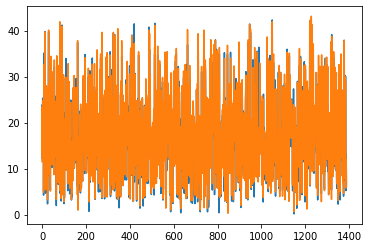

In [25]:
plt.plot(final_pred)
plt.plot(actual)

In [28]:
#df_test = pd.DataFrame(X_test[:,-4:], columns = ['NOx(GT)','NO2(GT)', 'CO(GT)', 'C6H6(GT)'])
final_df = pd.DataFrame(inv_new_2, columns = ['NOx(GT)','NO2(GT)', 'CO(GT)', 'C6H6(GT)', 'T_actual'])
pred = pd.DataFrame(final_pred, columns = ['T_predicted'])
df_final = pd.concat([final_df, pred], axis = 1)
df_final.head()

,NOx(GT),NO2(GT),CO(GT),C6H6(GT),T_actual,T_predicted
0,903.371601,125.423729,4.132441,21.503226,11.5,12.237018
1,604.401813,94.567797,3.760787,35.295699,23.5,23.852667
2,787.353474,159.084746,5.340315,21.503226,13.0,13.442517
3,354.516616,41.271186,1.345039,38.026882,24.8,25.305434
4,492.845921,91.762712,3.240472,30.652688,20.7,20.549221
